# Goals



### Train a monkey species classifier using vgg variants

### Understand what all differences happen when switching between vgg variants 

#### For this experiment you will be using mxnet backend

# What is vgg

## Readings on vgg

  1) Points from https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c
    - VGG addresses another very important aspect of CNNs: depth
    - All of VGG’s hidden layers use ReLU
    - Unlike 11x11 kernels of alexnet, it uses smaller ones 1x1 and 3x3 kernels


  2) Points from https://becominghuman.ai/what-is-the-vgg-neural-network-a590caa72643
    - Intuitively, more layer is better. However, the authors found that VGG-16 is better than VGG-19
    - Authors introduce multi-scale evaluationin the paper
  
  
  3) Read more here - 
    - https://arxiv.org/abs/1409.1556
    - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    - https://www.cs.toronto.edu/~frossard/post/vgg16/
    - https://d2l.ai/chapter_convolutional-modern/vgg.html



# Table of Contents


## [0. Install](#0)


## [1. Load experiment-1 with vgg11 base architecture](#1)


## [2. Visualize vgg11](#2)


## [3. Train the 1st classifier](#3)


## [4. Validate the 1st classifier ](#4)


## [5. Load experiment-2 with vgg13 base architecture](#5)


## [6. Visualize vgg13](#6)


## [7. Train the 2nd classifier](#7)


## [8. Validate the 2nd classifier ](#8)


## [9. Load experiment with vgg-16 base architecture and repeat the same](#9)


## [10. Load experiment with vgg-19 base architecture and repeat the same](#10)


## [11. Compare all the 4 experiments](#11)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [5]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 2105 (delta 110), reused 116 (delta 53), pack-reused 1905
Receiving objects: 100% (2105/2105), 73.71 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (1130/1130), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Monkey Species Classification
    - https://www.kaggle.com/slothkong/10-monkey-species

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AgjZP8UGCabVgyw5GcFUF8ZhR9yADYjd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1AgjZP8UGCabVgyw5GcFUF8ZhR9yADYjd" -O 10-monkey-species.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq 10-monkey-species.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load experiment with vgg-11 base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-11");

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-11
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-11/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Compare-vgg-depth
                        |
                        |
                        |-----vgg-11
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    10-monkey-species
        |
        |-----train
                |------species1
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------species2
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------species1
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------species2
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [4]:
gtf.Default(dataset_path="10-monkey-species/training/training", 
            model_name="vgg11", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     10-monkey-species/training/training
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:312: UserWarning: Ignoring 10-monkey-species/training/training/n9/n9151jpg of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 767
    Num val images:   330
    Num classes:      10

Model Params
    Model name:           vgg11
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg11
        Num of potentially trainable layers:  11
        Num of actual trainable layers:       11

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'s

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg11
        Num of potentially trainable layers:  11
        Num of actual trainable layers:       11

<a id='2'></a>
# Visualize vgg-11

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## vgg block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

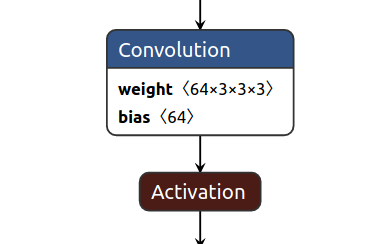

In [20]:
from IPython.display import Image
Image(filename='imgs/vgg_block1_mxnet.png') 

## Properties

  - This block has 2 layers
        - conv -> relu

## vgg block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

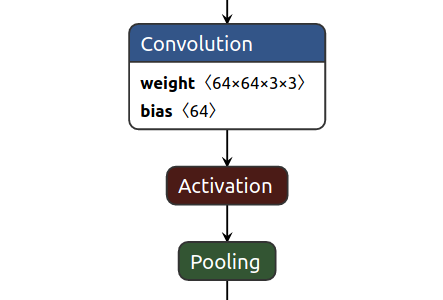

In [21]:
from IPython.display import Image
Image(filename='imgs/vgg_block2_mxnet.png') 

## Properties

  - This block has 3 layers
        - conv -> relu -> max_pool

## vgg fully connected chain
  - This is from vgg16 - so the weights will be different for vgg11

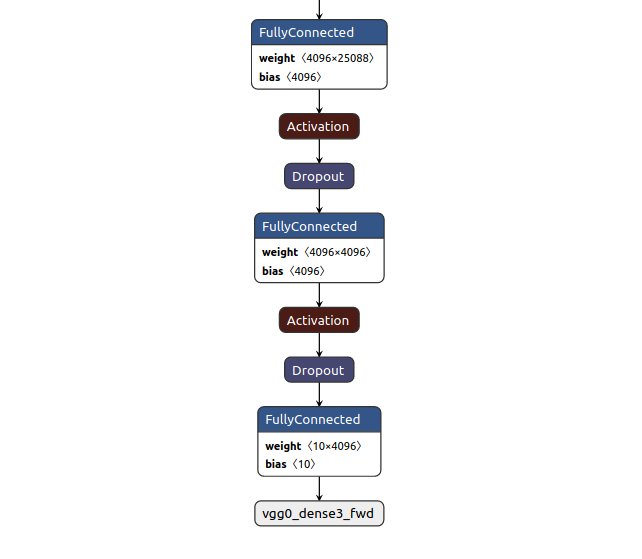

In [23]:
from IPython.display import Image
Image(filename='imgs/vgg_block_fc_mxnet.png') 

## vgg-11 Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

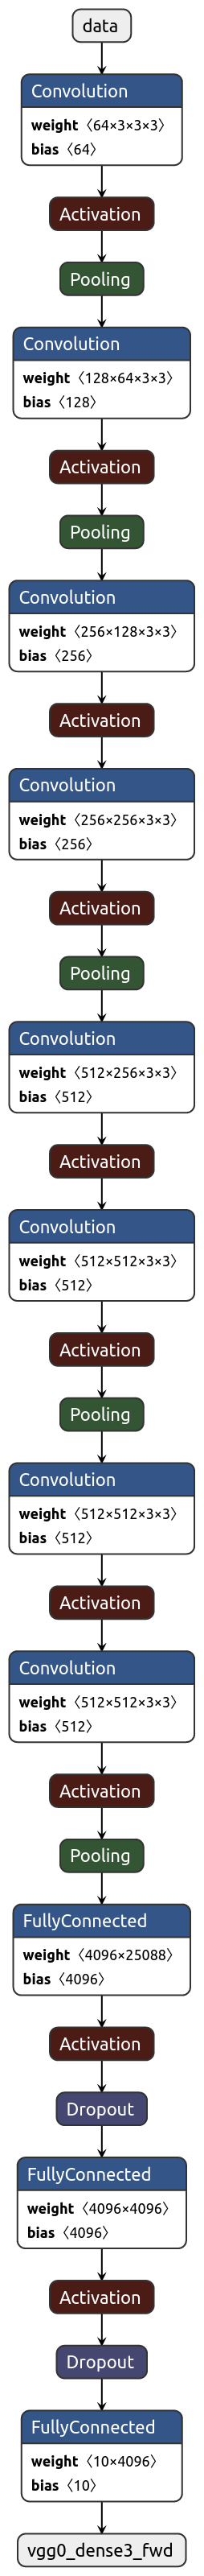

In [8]:
from IPython.display import Image
Image(filename='imgs/vgg11_mxnet.png') 

## Properties

  - This network 
    - has 5 type-1 blocks
    - has 3 type-2 blocks
    - post these blocks the type-3 (fc) block exists
    
    
  - To see what blocks are see notebooks 1.1, 1.2, 1.3 in this same folder


<a id='3'></a>
# Train the classifier

In [5]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.691, Train-loss: 0.888 | Val-acc: 0.863636, Val-loss: 0.391, | time: 18.2 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.947, Train-loss: 0.163 | Val-acc: 0.896970, Val-loss: 0.355, | time: 27.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.973, Train-loss: 0.093 | Val-acc: 0.954545, Val-loss: 0.119, | time: 26.2 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.980, Train-loss: 0.061 | Val-acc: 0.930303, Val-loss: 0.187, | time: 18.2 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.987, Train-loss: 0.039 | Val-acc: 0.951515, Val-loss: 0.173, | time: 19.5 sec

    Training completed in: 1m 26s
    Best val Acc:          0.954545

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-11/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-11/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Validate the classifier

In [6]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-11", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-depth/vgg-11/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-11
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-11/



In [7]:
gtf.Dataset_Params(dataset_path="10-monkey-species/validation/validation");
gtf.Dataset();

Dataset Details
    Test path:      10-monkey-species/validation/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 272
    Num classes:      10



### Run Validation

In [8]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. n0 - 100.0 %
            1. n1 - 96.42857142857143 %
            2. n2 - 100.0 %
            3. n3 - 100.0 %
            4. n4 - 100.0 %
            5. n5 - 100.0 %
            6. n6 - 100.0 %
            7. n7 - 96.42857142857143 %
            8. n8 - 100.0 %
            9. n9 - 96.15384615384616 %
        total images:            272
        num correct predictions: 269
        Average accuracy (%):    98.89705882352942



<a id='5'></a>
# Load experiment with vgg-13 base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-13");

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-13
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-13/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Compare-vgg-depth
                        |
                        |
                        |-----vgg-11 (created before)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                         |
                         |
                         |-----vgg-13 (created now)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    10-monkey-species
        |
        |-----train
                |------species1
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------species2
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------species1
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------species2
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [10]:
gtf.Default(dataset_path="10-monkey-species/training/training", 
            model_name="vgg13", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     10-monkey-species/training/training
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:312: UserWarning: Ignoring 10-monkey-species/training/training/n9/n9151jpg of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 767
    Num val images:   330
    Num classes:      10

Model Params
    Model name:           vgg13
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg13
        Num of potentially trainable layers:  13
        Num of actual trainable layers:       13

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'s

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg13
        Num of potentially trainable layers:  13
        Num of actual trainable layers:       13

<a id='6'></a>
# Visualize vgg-13

In [18]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8083);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8083


## vgg-13 Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

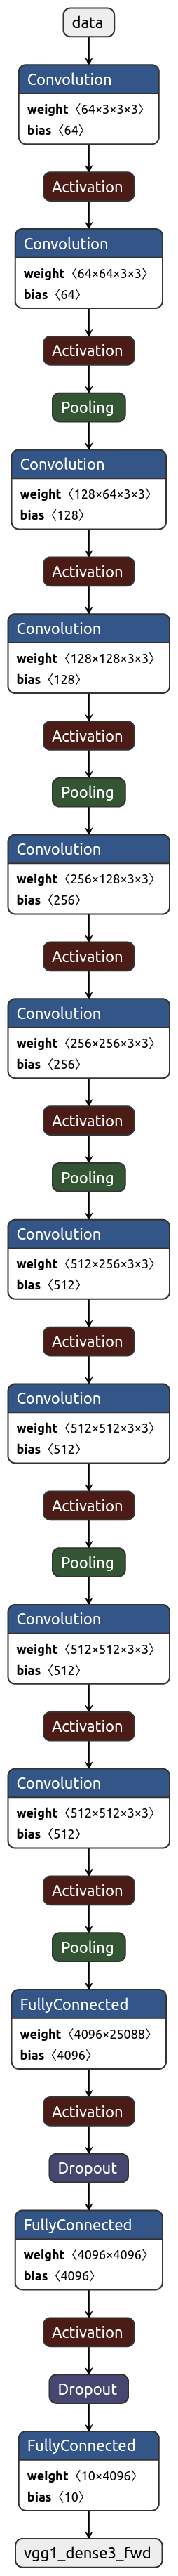

In [19]:
from IPython.display import Image
Image(filename='imgs/vgg13_mxnet.png') 

## Properties

  - This network 
    - has 5 type-1 blocks
    - has 4 type-2 blocks
    - post these blocks the type-3 (fc) block exists
    

<a id='7'></a>
# Train the classifier

In [11]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.683, Train-loss: 0.959 | Val-acc: 0.918182, Val-loss: 0.271, | time: 21.5 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.963, Train-loss: 0.149 | Val-acc: 0.951515, Val-loss: 0.147, | time: 32.4 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.967, Train-loss: 0.097 | Val-acc: 0.942424, Val-loss: 0.161, | time: 22.9 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.982, Train-loss: 0.055 | Val-acc: 0.957576, Val-loss: 0.119, | time: 29.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.991, Train-loss: 0.028 | Val-acc: 0.951515, Val-loss: 0.136, | time: 21.3 sec

    Training completed in: 1m 40s
    Best val Acc:          0.957576

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-13/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-13/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:

<Figure size 432x288 with 0 Axes>

<a id='8'></a>
# Validate the classifier

In [12]:
gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-13", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-depth/vgg-13/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-13
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-13/



In [13]:
gtf.Dataset_Params(dataset_path="10-monkey-species/validation/validation");
gtf.Dataset();

Dataset Details
    Test path:      10-monkey-species/validation/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 272
    Num classes:      10



### Run Validation

In [14]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. n0 - 100.0 %
            1. n1 - 100.0 %
            2. n2 - 100.0 %
            3. n3 - 100.0 %
            4. n4 - 96.15384615384616 %
            5. n5 - 100.0 %
            6. n6 - 100.0 %
            7. n7 - 100.0 %
            8. n8 - 100.0 %
            9. n9 - 100.0 %
        total images:            272
        num correct predictions: 271
        Average accuracy (%):    99.63235294117648



<a id='9'></a>
# Load experiment with vgg-16 base architecture and repeat the same

In [15]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-16");


# Insert data and set params in default mode
gtf.Default(dataset_path="10-monkey-species/training/training", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-16
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16/

Dataset Details
    Train path:     10-monkey-species/training/training
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:312: UserWarning: Ignoring 10-monkey-species/training/training/n9/n9151jpg of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 767
    Num val images:   330
    Num classes:      10

Model Params
    Model name:           vgg16
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           vgg16
        Num of potentially trainable layers:  16
        Num of actual trainable layers:       16

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'s

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg16
        Num of potentially trainable layers:  16
        Num of actual trainable layers:       16

In [29]:
## Visualize

gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8084);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8084


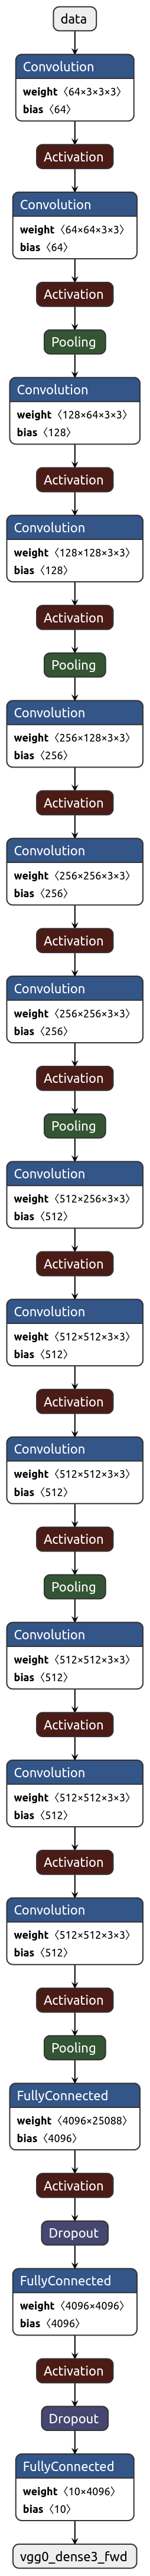

In [31]:
from IPython.display import Image
Image(filename='imgs/vgg16_mxnet.png') 

## Properties

  - This network 
    - has 9 type-1 blocks
    - has 5 type-2 blocks
    - post these blocks the type-3 (fc) block exists

In [16]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.751, Train-loss: 0.766 | Val-acc: 0.906061, Val-loss: 0.278, | time: 24.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.954, Train-loss: 0.120 | Val-acc: 0.939394, Val-loss: 0.177, | time: 35.8 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.973, Train-loss: 0.099 | Val-acc: 0.957576, Val-loss: 0.123, | time: 32.6 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.978, Train-loss: 0.068 | Val-acc: 0.960606, Val-loss: 0.109, | time: 32.6 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.992, Train-loss: 0.025 | Val-acc: 0.972727, Val-loss: 0.097, | time: 30.1 sec

    Training completed in: 2m 7s
    Best val Acc:          0.972727

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log: 

<Figure size 432x288 with 0 Axes>

In [17]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-16", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="10-monkey-species/validation/validation");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-depth/vgg-16/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-16
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-16/

Dataset Details
    Test path:      10-monkey-species/validation/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 272
    Num classes:      10

Testing



    Result
        class based accuracies
            0. n0 - 100.0 %
            1. n1 - 100.0 %
            2. n2 - 100.0 %
            3. n3 - 100.0 %
            4. n4 - 100.0 %
            5. n5 - 96.42857142857143 %
            6. n6 - 100.0 %
            7. n7 - 100.0 %
            8. n8 - 100.0 %
            9. n9 - 96.15384615384616 %
        total images:            272
        num correct predictions: 270
        Average accuracy (%):    99.26470588235294



<a id='10'></a>
# Load experiment with vgg-19 base architecture and repeat the same

In [18]:
# Load experiment

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-19");


# Insert data and set params in default mode
gtf.Default(dataset_path="10-monkey-species/training/training", 
            model_name="vgg19", 
            freeze_base_network=False,
            num_epochs=5);

Mxnet Version: 1.5.0

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-19
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-19/

Dataset Details
    Train path:     10-monkey-species/training/training
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7



/home/abhi/.virtualenvs/finetune_py36/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:312: UserWarning: Ignoring 10-monkey-species/training/training/n9/n9151jpg of type . Only support .jpg, .jpeg, .png
  filename, ext, ', '.join(self._exts)))


Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 767
    Num val images:   330
    Num classes:      10

Model Params
    Model name:           vgg19
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
Model file is not found. Downloading.


519181KB [01:50, 4678.45KB/s]                            


    Model Loaded on device
        Model name:                           vgg19
        Num of potentially trainable layers:  19
        Num of actual trainable layers:       19

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:                           vgg19
        Num of potentially trainable layers:  19
        Num of actual trainable layers:       19

In [21]:
## Visualize

gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8084);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks

Stopping http://localhost:8084
Serving 'model-symbol.json' at http://localhost:8084


In [ ]:
from IPython.display import Image
Image(filename='imgs/vgg19_mxnet.png')

## Properties

  - This network 
    - has 11 type-1 blocks
    - has 5 type-2 blocks
    - post these blocks the type-3 (fc) block exists

In [22]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.794, Train-loss: 0.632 | Val-acc: 0.948485, Val-loss: 0.145, | time: 27.3 sec

    Epoch 2/5
    ----------




    curr_lr - 0.00098
    [Epoch 2] Train-acc: 0.975, Train-loss: 0.088 | Val-acc: 0.963636, Val-loss: 0.096, | time: 33.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.0009603999999999999
    [Epoch 3] Train-acc: 0.980, Train-loss: 0.051 | Val-acc: 0.978788, Val-loss: 0.079, | time: 33.4 sec

    Epoch 4/5
    ----------




    curr_lr - 0.0009411919999999999
    [Epoch 4] Train-acc: 0.977, Train-loss: 0.070 | Val-acc: 0.963636, Val-loss: 0.137, | time: 26.5 sec

    Epoch 5/5
    ----------




    curr_lr - 0.0009223681599999998
    [Epoch 5] Train-acc: 0.990, Train-loss: 0.034 | Val-acc: 0.972727, Val-loss: 0.089, | time: 30.6 sec

    Training completed in: 2m 1s
    Best val Acc:          0.978788

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-19/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-19/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log: 

<Figure size 432x288 with 0 Axes>

In [23]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Compare-vgg-depth", "vgg-19", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="10-monkey-species/validation/validation");
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Compare-vgg-depth/vgg-19/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Compare-vgg-depth
    Experiment: vgg-19
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Compare-vgg-depth/vgg-19/

Dataset Details
    Test path:      10-monkey-species/validation/validation
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 272
    Num classes:      10

Testing



    Result
        class based accuracies
            0. n0 - 100.0 %
            1. n1 - 100.0 %
            2. n2 - 100.0 %
            3. n3 - 96.66666666666667 %
            4. n4 - 100.0 %
            5. n5 - 96.42857142857143 %
            6. n6 - 100.0 %
            7. n7 - 100.0 %
            8. n8 - 100.0 %
            9. n9 - 100.0 %
        total images:            272
        num correct predictions: 270
        Average accuracy (%):    99.26470588235294



<a id='11'></a>
# Comparing all the experiments

In [25]:
# Invoke the comparison class
from compare_prototype import compare

### Creating and managing comparison experiments
        - Provide project name

In [26]:
# Create a project 
gtf = compare(verbose=1);
gtf.Comparison("Compare-effect-of-network-depth");

Comparison: - Compare-effect-of-network-depth


### This creates files and directories as per the following structure
    
    workspace
        |
        |--------comparison
                        |
                        |
                        |-----Compare-effect-of-network-depth
                                    |
                                    |------stats_best_val_acc.png
                                    |------stats_max_gpu_usage.png
                                    |------stats_training_time.png
                                    |------train_accuracy.png
                                    |------train_loss.png
                                    |------val_accuracy.png
                                    |------val_loss.png
                                    
                        |
                        |-----comparison.csv (Contains necessary details of all experiments)

### Add the experiments
        - First argument - Project name
        - Second argument - Experiment name

In [27]:
gtf.Add_Experiment("Compare-vgg-depth", "vgg-11");
gtf.Add_Experiment("Compare-vgg-depth", "vgg-13");
gtf.Add_Experiment("Compare-vgg-depth", "vgg-16");
gtf.Add_Experiment("Compare-vgg-depth", "vgg-19");

Project - Compare-vgg-depth, Experiment - vgg-11 added
Project - Compare-vgg-depth, Experiment - vgg-13 added
Project - Compare-vgg-depth, Experiment - vgg-16 added
Project - Compare-vgg-depth, Experiment - vgg-19 added


## Run Analysis

In [28]:
gtf.Generate_Statistics();

Generating statistics...
Generated



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## Visualize and study comparison metrics

### Training Accuracy Curves

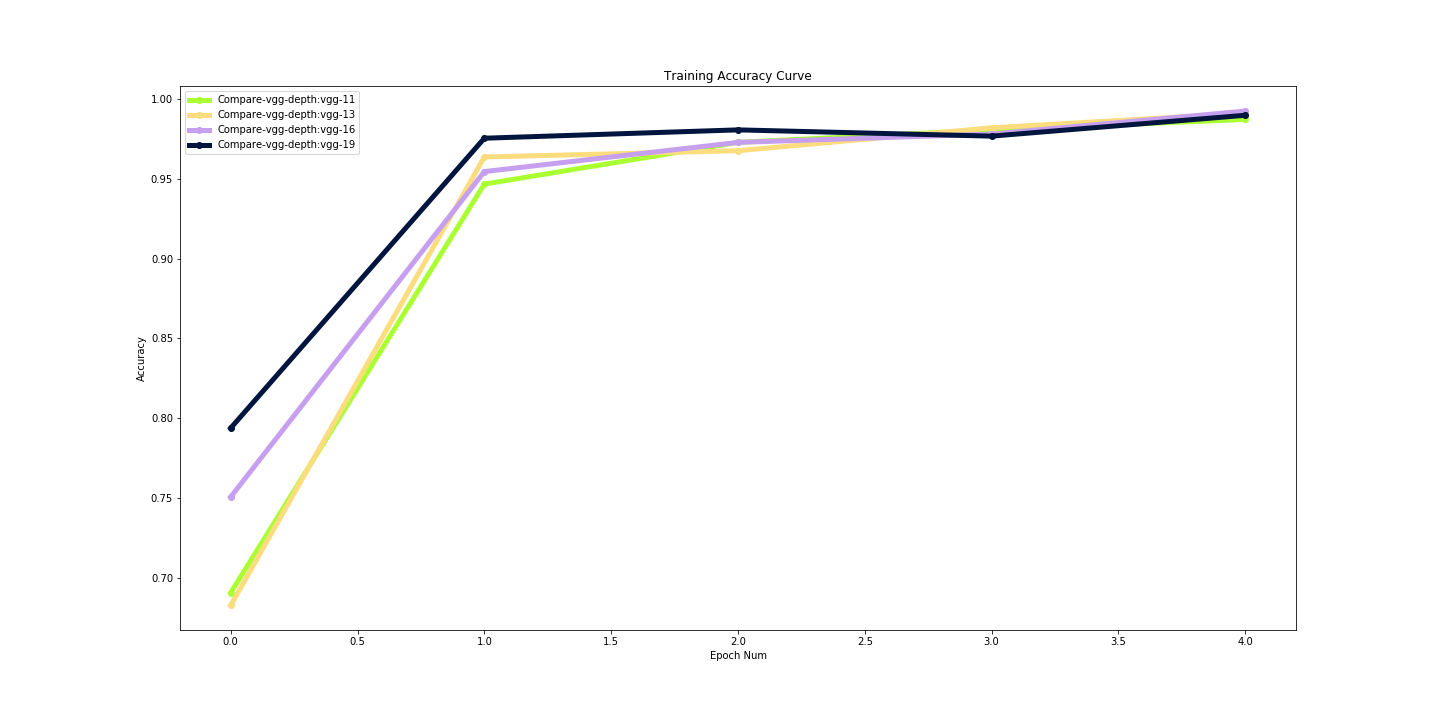

In [29]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/train_accuracy.png") 

### Training Loss Curves

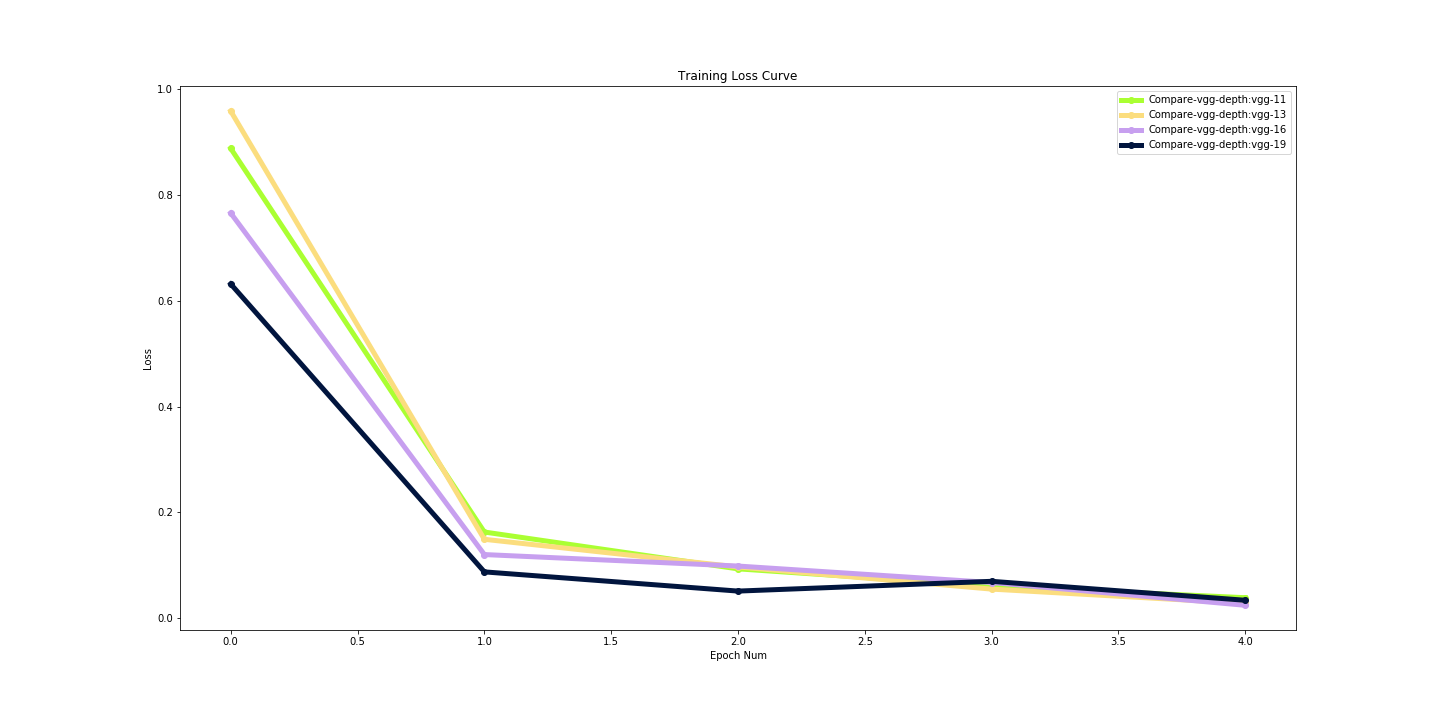

In [30]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/train_loss.png") 

### Validation Accuracy Curves

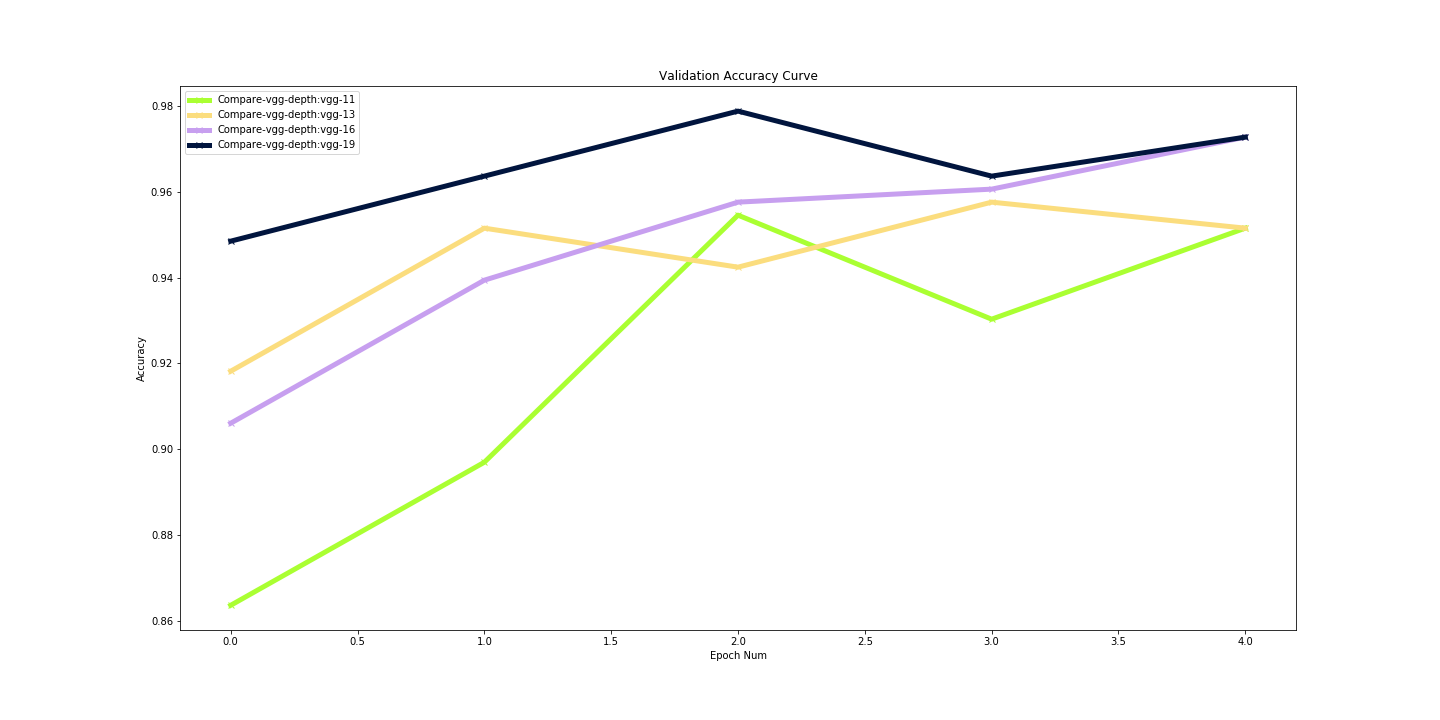

In [31]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/val_accuracy.png") 

### Validation loss curves

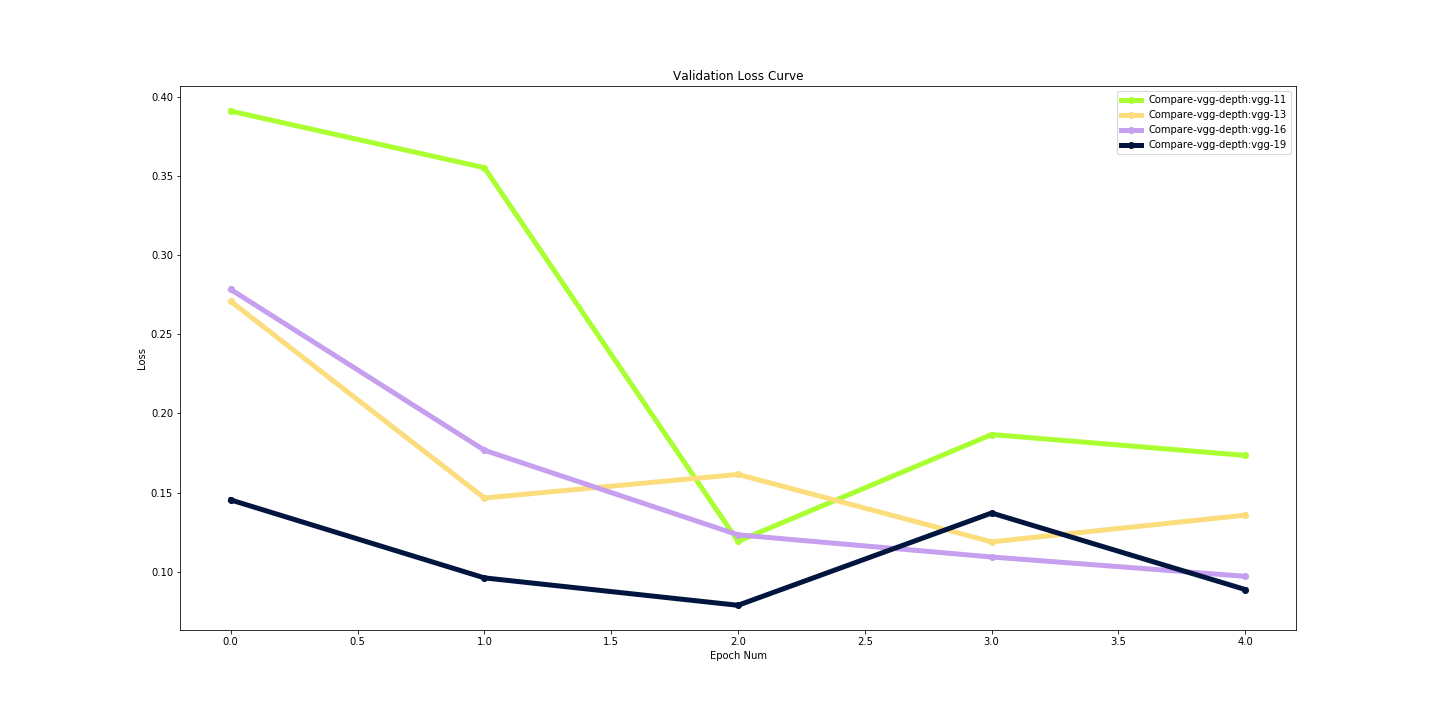

In [32]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/val_loss.png") 

### Training Times and max gpu usages

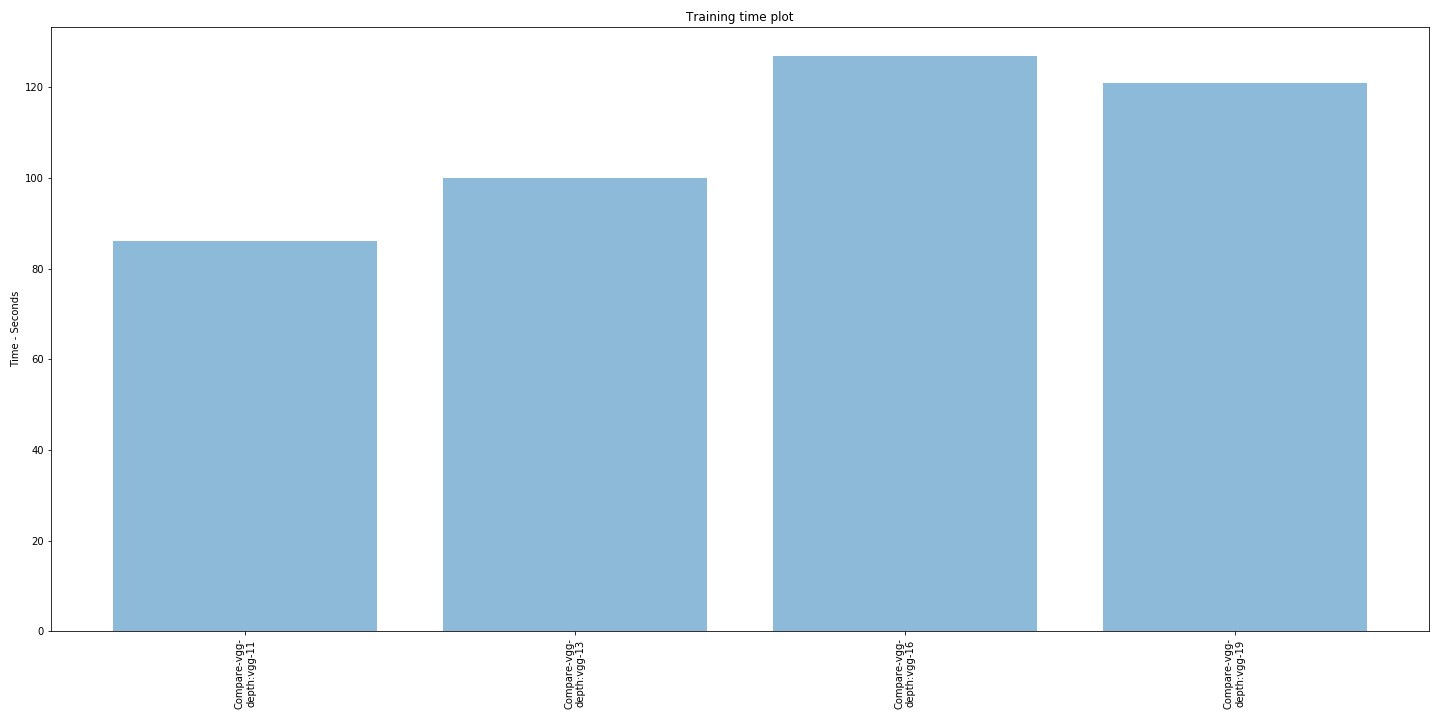

In [35]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/stats_training_time.png") 

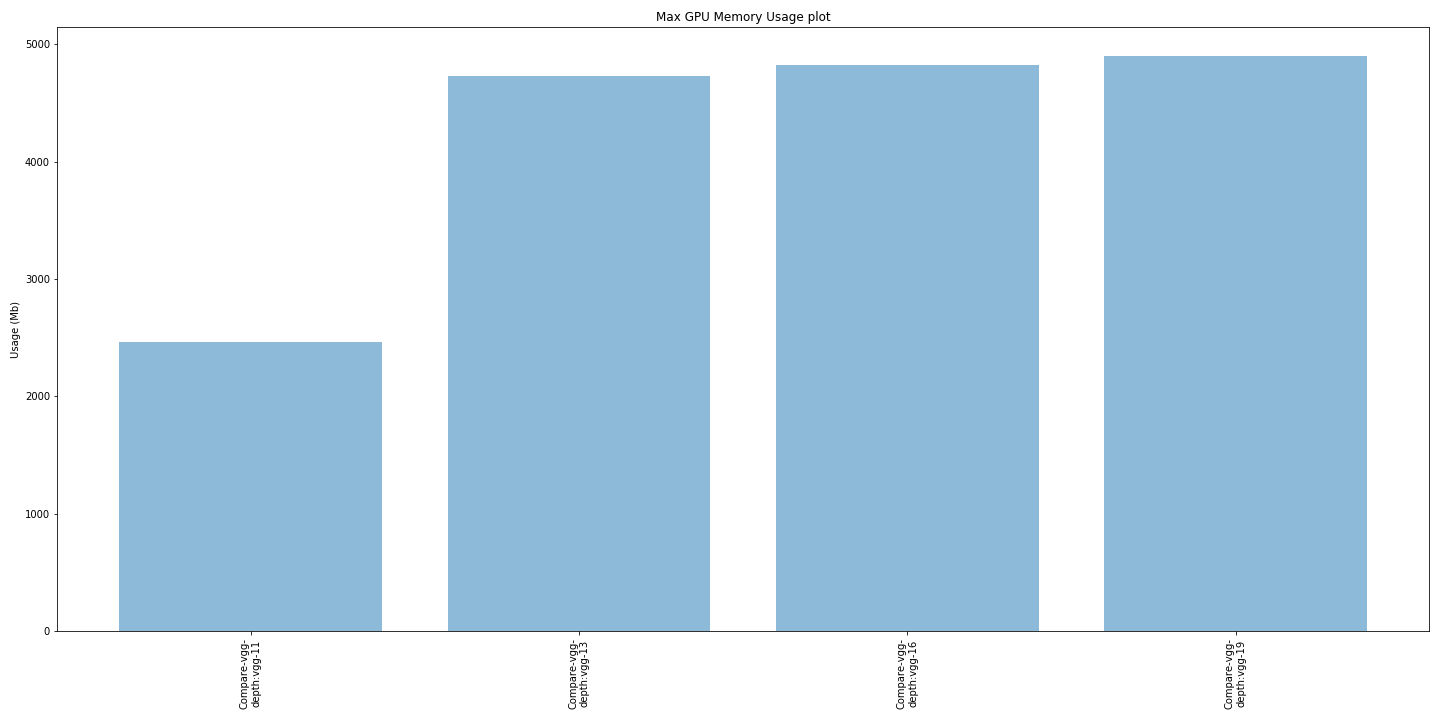

In [36]:
from IPython.display import Image
Image(filename="workspace/comparison/Compare-effect-of-network-depth/stats_max_gpu_usage.png") 

# Comparisons 
#### You may get differet results

    Network  |   Type-1 Blocks    |   Type-2 Blocks   |   Val Acc   | Training time (sec)  |  Gpu Usage (mb)
    
    
    vgg-11   |         5          |        3          |     98.8    |        85            |       2500
    
    
    vgg-13   |         5          |        4          |     99.6    |        100           |       4700
    
    
    
    vgg-16   |         9          |        5          |     99.2    |        140           |       4800
    
    
    
    vgg-19   |        11          |        5          |     99.2    |        120           |       4900
    
    
    
    